#### 1. PyTorch I

In [ ]:
# Torch 및 Caffe2를 기반으로 한 파이썬 딥러닝 라이브러리이다.

In [102]:
# 텐서 vs. NumPy 배열
# 텐서: GPU 연산, 자동 미분 지원.
# NumPy: CPU 기반 연산만 가능.
# PyTorch의 텐서는 NumPy보다 더 강력한 기능을 제공하며, 딥러닝 및 대규모 데이터 연산에 적합합니다.
# 딥러닝에서 텐서의 역할
# 입력 데이터(이미지, 텍스트 등)를 표현, 모델의 가중치와 편향을 저장, 연산 결과(출력)를 계산.
# 이미지 데이터를 모델에 넣으면 이는 고차원 텐서로 표현된다.

In [52]:
# GPU 사용 가능 여부 확인
import torch
print(torch.cuda.is_available())

True


#### 1-1. torch 생성

In [3]:
# 모든 값이 0인 텐서
zeros = torch.zeros((2, 3))
print(zeros)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# 모든 값이 1인 텐서
ones = torch.ones((3, 3))
print(ones)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# 임의의 값으로 초기화된 텐서
random_tensor = torch.rand((4, 2))
print(random_tensor)

tensor([[0.3536, 0.8030],
        [0.8829, 0.0534],
        [0.7438, 0.9064],
        [0.3665, 0.0901]])


In [6]:
# 0부터 9까지 범위의 값 생성
range_tensor = torch.arange(0, 10)
print(range_tensor)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [7]:
# 1D tensor (vector)
print(torch.tensor([1, 2, 3, 4, 5]))

tensor([1, 2, 3, 4, 5])


In [8]:
# 2D tensor (procession)(행렬)
print(torch.tensor([[1, 2], [3, 4], [5, 6]]))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [9]:
# device
# GPU 또는 CPU
# GPU가 없다면 오류가 발생한다.
print(torch.tensor([[1, 2], [3, 4]], device = 'cuda:0'))

tensor([[1, 2],
        [3, 4]], device='cuda:0')


In [55]:
# dtype
# 데이터 타입
# float64
# 기본적인 실수형 데이터 타입으로 64비트 부동소수점 실수이다.
print(torch.tensor([[1, 2], [3, 4]], dtype = torch.float64))

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


#### 1-2. numpy로 변환

In [11]:
# NumPy array (배열)
import numpy as np
np_array = np.array([1, 2, 3])
tensor_from_np = torch.from_numpy(np_array)
print(tensor_from_np)

tensor([1, 2, 3])


In [12]:
temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy())

[[1 2]
 [3 4]]


In [13]:
# 연산이 이루어질 장치 지정
# cuda는 nvidia의 gpu에서 병렬 처리를 할 수 있도록 도와주는 병렬 컴퓨팅 플랫폼이다.
temp = torch.tensor([[1, 2], [3, 4]], device = 'cuda:0')
temp = torch.tensor([[1, 2], [3, 4]], device = 'cpu:0')
print(temp.to('cpu').numpy())

[[1 2]
 [3 4]]


#### 1-3. slicing

In [54]:
temp = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(temp[0], temp[1], temp[-1])
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(10.)
tensor([3., 4., 5.]) tensor([5., 6., 7., 8., 9.])


#### 1-4. calculation

In [15]:
# 덧셈과 뺄셈
w = torch.tensor([3, 4, 6])
v = torch.tensor([1, 2, 3])
print(w + v)
print(w - v)
print(w + 1)

tensor([4, 6, 9])
tensor([2, 2, 3])
tensor([4, 5, 7])


In [16]:
# 행렬 연산
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

# 행렬 곱셈
print(torch.matmul(x, y))

# 요소별 곱셈
print(x * y)

tensor([[19, 22],
        [43, 50]])
tensor([[ 5, 12],
        [21, 32]])


In [17]:
# 텐서를 gpu로 이동시켜 gpu 연산
# 텐서를 GPU로 이동
tensor = x
tensor_gpu = tensor.to('cuda')
print(tensor_gpu.device)

cuda:0


In [18]:
# 자동 미분
# 텐서는 자동 미분을 지원하여 딥러닝 모델의 학습에 사용된다.
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2
# 역전파 계산
y.backward()
# dy/dx = 2x
print(x.grad)

tensor(4.)


#### 1-5. 텐서 모양과 모양 바꾸기

In [19]:
temp = torch.tensor([[1, 2], [3, 4]])

In [20]:
# 텐서의 크기
print(temp.shape)

torch.Size([2, 2])


In [21]:
print(temp.reshape(4, 1))

tensor([[1],
        [2],
        [3],
        [4]])


In [22]:
print(temp.reshape(-1))

tensor([1, 2, 3, 4])


In [23]:
print(temp.reshape(1, -1))

tensor([[1, 2, 3, 4]])


In [24]:
print(temp.reshape(-1, 1))

tensor([[1],
        [2],
        [3],
        [4]])


In [56]:
# 1.원소가 [1, 2, 3, 4, 5, 6] 인 Tensor 생성하기.
ex_tensor = torch.Tensor([1, 2, 3, 4, 5, 6])

In [26]:
# 2.해당 Tensor의 모양을 (2,3)으로 바꾸기.
print(ex_tensor.reshape(2, 3))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [27]:
# 3.해당 Tensor의 모든 원소에 5를 더하기.
print(ex_tensor + 5)

tensor([ 6.,  7.,  8.,  9., 10., 11.])


In [28]:
# 4.해당 Tensor에서 [2,3,4] 만을 가진 Tensor를 슬라이싱하기.
print(ex_tensor[1:4])

tensor([2., 3., 4.])


#### 1-6. 텐서 차원 다루기

In [29]:
print(torch.Tensor([1, 2, 3, 4]).reshape(2, 2))

tensor([[1., 2.],
        [3., 4.]])


In [57]:
print(torch.Tensor([[1, 2, 3], [4, 5, 6]]).reshape(-1))

tensor([1., 2., 3., 4., 5., 6.])


In [31]:
print(torch.Tensor([[1, 4], [2, 5], [3, 6]]).reshape(-1))

tensor([1., 4., 2., 5., 3., 6.])


In [32]:
print(torch.stack([torch.Tensor([1, 2, 3, 4]), torch.Tensor([1, 2, 3, 4])]))

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.]])


In [58]:
print(torch.cat([torch.Tensor([1, 2, 3, 4]), torch.Tensor([1, 2, 3, 4])]))

tensor([1., 2., 3., 4., 1., 2., 3., 4.])


In [59]:
# 1.두 텐서 torch.Tensor([[1, 2, 3, 4], [1, 2, 3, 4]]), torch.Tensor([[5, 6, 7, 8], [9, 10, 11, 12]]) 를 stack하라.
print(torch.stack([torch.Tensor([[1, 2, 3, 4], [1, 2, 3, 4]]), torch.Tensor([[5, 6, 7, 8], [9, 10, 11, 12]])]))
print(torch.cat([torch.Tensor([[1, 2, 3, 4], [1, 2, 3, 4]]), torch.Tensor([[5, 6, 7, 8], [9, 10, 11, 12]])]))

tensor([[[ 1.,  2.,  3.,  4.],
         [ 1.,  2.,  3.,  4.]],

        [[ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


In [35]:
# 2.두 텐서 torch.Tensor([[1,2,3,4], [1,2,3,4]]), torch.Tensor([[5,6,7,8], [9,10,11,12]]) 를 cat하라.
x = torch.Tensor([[1, 2, 3], [4, 5, 6]])
y = torch.Tensor([[7, 8, 9]])
torch.cat([x, y])

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

#### 1-7. Tensor 생성의 다양한 방법들

In [36]:
# arange
# linspace
# zeros
# ones
# rand

In [37]:
print(torch.arange(0, 10, 1)) # arguments: start, stop, step
print('---------------------------')
print(torch.arange(-1, 1, 0.1))
print('---------------------------')
print(torch.linspace(0, 10, 25))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
---------------------------
tensor([-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01])
---------------------------
tensor([ 0.0000,  0.4167,  0.8333,  1.2500,  1.6667,  2.0833,  2.5000,  2.9167,
         3.3333,  3.7500,  4.1667,  4.5833,  5.0000,  5.4167,  5.8333,  6.2500,
         6.6667,  7.0833,  7.5000,  7.9167,  8.3333,  8.7500,  9.1667,  9.5833,
        10.0000])


In [38]:
print(torch.zeros((3, 3)))
print('---------------------------')
print(torch.ones((3, 3)))
print('---------------------------')
print(torch.rand((3, 3)))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
---------------------------
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
---------------------------
tensor([[0.5359, 0.6651, 0.3860],
        [0.6757, 0.2324, 0.8191],
        [0.5553, 0.6407, 0.7644]])


#### 1-8. Tensor의 데이터 처리

In [60]:
data = torch.linspace(0, 1, 25).reshape(5, 5)
print(torch.mean(data[:,3]))
print('---------------------------')
print(torch.std(data[:,3]), torch.var(data[:,3]))
print('---------------------------')
print(data[:,3].min())

tensor(0.5417)
---------------------------
tensor(0.3294) tensor(0.1085)
---------------------------
tensor(0.1250)


In [61]:
print(data[:,3].max())
print('---------------------------')
print(torch.max(data[:,3]))
print('---------------------------')
print(torch.sum(data))

tensor(0.9583)
---------------------------
tensor(0.9583)
---------------------------
tensor(12.5000)


In [41]:
# 1. 0~8까지의 값을 가지는 3x3 텐서를 생성하라.
[[0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]]

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [42]:
# 2. 0~24까지의 값을 가지는 5x5 텐서를 생성하라.
# 3. 0~24까지의 값을 가지는 5x5 텐서를 생성하고 해당 텐서의 평균을 구하라.

# x = torch.arange(0, 9, 1.0).reshape((3,3))
x = torch.linspace(0, 8, 9).reshape((3, 3))
print(x)

y = torch.linspace(0, 24, 25).reshape((5, 5))
print(y)

print(torch.mean(y))

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])
tensor(12.)


#### 1-9. torch의 각종 수학 함수들

In [43]:
x = torch.linspace(0.1, 6, 10)
print(torch.sin(x))
print('---------------------------')
print(torch.tan(x))
print('---------------------------')
print(x ** 2)

tensor([ 0.0998,  0.6857,  0.9873,  0.8796,  0.4072, -0.2340, -0.7782, -0.9997,
        -0.8068, -0.2794])
---------------------------
tensor([ 0.1003,  0.9420,  6.2090, -1.8486, -0.4458,  0.2407,  1.2390, 42.5454,
        -1.3656, -0.2910])
---------------------------
tensor([1.0000e-02, 5.7086e-01, 1.9912e+00, 4.2711e+00, 7.4105e+00, 1.1409e+01,
        1.6268e+01, 2.1986e+01, 2.8563e+01, 3.6000e+01])


In [44]:
print(torch.exp(x))
print('---------------------------')
print(torch.log10(x))
print('---------------------------')
print(torch.tanh(x))

tensor([  1.1052,   2.1288,   4.1005,   7.8985,  15.2141,  29.3056,  56.4488,
        108.7323, 209.4415, 403.4288])
---------------------------
tensor([-1.0000, -0.1217,  0.1496,  0.3153,  0.4349,  0.5286,  0.6057,  0.6711,
         0.7279,  0.7782])
---------------------------
tensor([0.0997, 0.6385, 0.8877, 0.9684, 0.9914, 0.9977, 0.9994, 0.9998, 1.0000,
        1.0000])


In [45]:
print(torch.sinc(x))
print('---------------------------')
print(torch.erf(x))
print('---------------------------')
print(torch.sigmoid(x))

tensor([ 9.8363e-01,  2.9265e-01, -2.1684e-01,  3.2023e-02,  8.9574e-02,
        -8.7375e-02,  8.2494e-03,  5.6280e-02, -5.2588e-02,  2.5305e-09])
---------------------------
tensor([0.1125, 0.7147, 0.9540, 0.9965, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
---------------------------
tensor([0.5250, 0.6804, 0.8039, 0.8876, 0.9383, 0.9670, 0.9826, 0.9909, 0.9952,
        0.9975])


#### 1-10. matplotlib를 이용한 plot

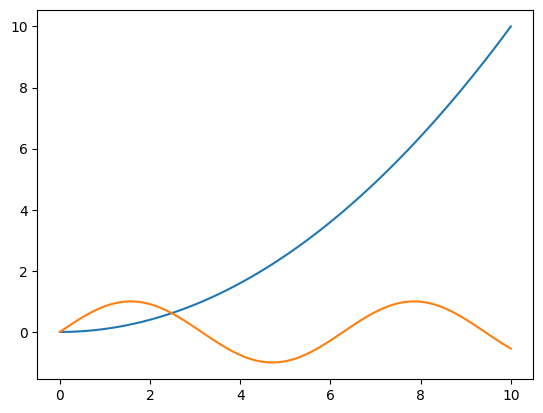

In [46]:
import matplotlib.pyplot as plt

x = torch.linspace(0, 10, 100)
plt.plot(x, x ** 2 / 10)
plt.plot(x, torch.sin(x))
plt.show()

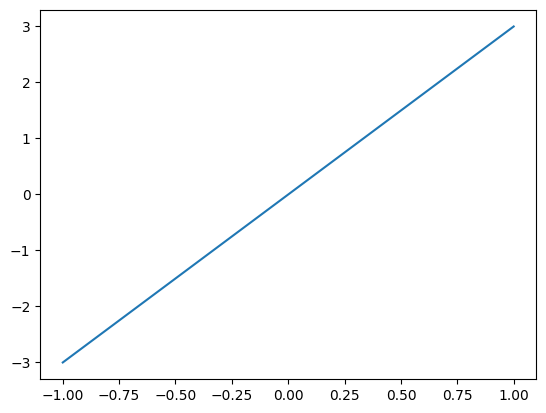

In [47]:
# torch.linspace 함수를 이용하여  −1 ≤ x ≤ 1  범위에서  f(x) = 3x 함수를 그려라.
x = torch.linspace(-1, 1, 100)
plt.plot(x, 3 * x)
plt.show()

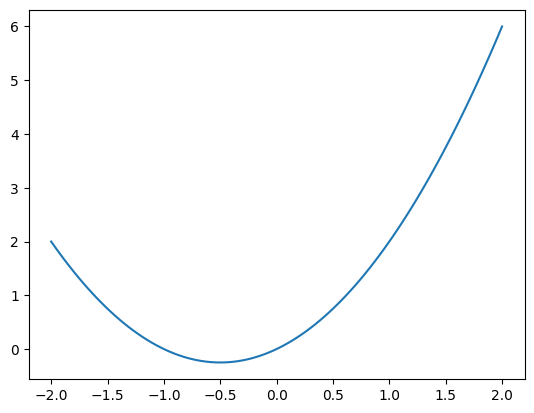

In [48]:
# f(x) = x^2 + x 함수를  −2≤x≤2  범위에서 그려라.
x = torch.linspace(-2, 2, 100)
plt.plot(x, x ** 2 + x)
plt.show()

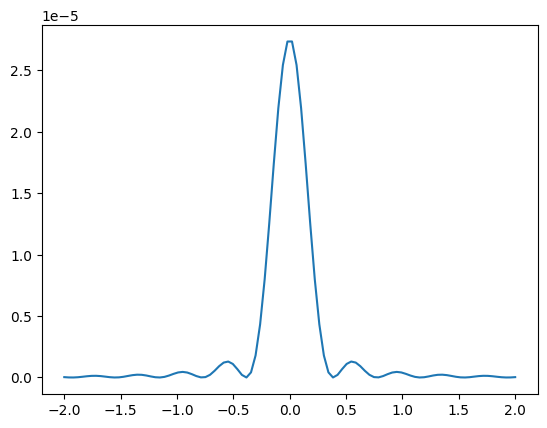

In [49]:
# 사각 슬릿을 통과한 빛의 세기는 아래와 같은 형태로 표현할 수 있다.
# 슬릿의 크기  w  = 1 mm, 파장  λ  638 nm, 거리  L  10 m 일 때, 스크린에 어떤 패턴이 나타나는지 그려라.
# I(x)=sinc^2((π * x * w)/(lam * L))
w = 1e-3
lam = 638e-9
L = 10
x = torch.linspace(-2, 2, 100)
y = torch.sinc(torch.pi * x * w / (lam * L)) ** 2
plt.plot(x,y)